# Εργασία 2

### Ερώτημα Α: Brute force αλγόριθμος

Ερώτημα Α.1) Να αναπτύξετε έναν “brute force” αλγόριθμο για την επίλυση του προβλήματος k-center.

In [1]:
# Να συμπληρώσετε τις εντολές import που απαιτούνται για την Εργασία 2
# import ...
import networkx as nx
import itertools
import random
import matplotlib.pyplot as plt
import timeit
import numpy as np
import copy

In [2]:
# Να συμπληρώσετε τον κώδικα της συνάρτησης k_centers_objective_value(G, centers) 
# ώστε να επιστρέφει το κόστος της λύσης "centers" για τον γράφο G.

def k_centers_objective_value(G, centers):
        shortest_paths = nx.multi_source_dijkstra_path_length(G, centers, weight='weight')
        # the score that we want to minimize is the maximum distance from centers
        score = max(shortest_paths.values())
        return score

In [3]:
# Έλεγχος και αξιολόγηση της απάντησης. Μην κάνετε αλλαγές στο κελί αυτό.

from nose.tools import assert_equal

G = nx.read_gexf('graph_0005_01234.gexf', node_type=int)
assert_equal(k_centers_objective_value(G, [0, 1]), 156)
assert_equal(k_centers_objective_value(G, [0, 1, 2]), 130)

G = nx.read_gexf('graph_0010_01234.gexf', node_type=int)
assert_equal(k_centers_objective_value(G, [2, 4]), 338)
assert_equal(k_centers_objective_value(G, [0, 1, 2]), 257)


In [4]:
# Να συμπληρώσετε τον κώδικα της συνάρτησης k_centers_brute_force(G, k) ώστε να υπολογίζει 
# με brute force τρόπο τη βέλτιστη λύση μεγέθους k για τον γράφο G. 
# Η συνάρτηση να επιστρέφει το κόστος και τη λίστα των centers της βέλτισης λύσης.

def k_centers_brute_force(G, k):
    # find the combinations
    comb = itertools.combinations(G.nodes, k)
    score = float('Inf')
    best_comb = []
    for centers in comb:
        temp_score = k_centers_objective_value(G,centers)
        if temp_score < score:
            score = temp_score
            best_comb = list(centers)
    return score, best_comb

In [5]:
# Έλεγχος και αξιολόγηση της απάντησης. Μην κάνετε αλλαγές στο κελί αυτό.

G = nx.read_gexf('graph_0005_01234.gexf', node_type=int)
assert_equal(k_centers_brute_force(G, 2), (152, [0,3]))

G = nx.read_gexf('graph_0010_01234.gexf', node_type=int)
assert_equal(k_centers_brute_force(G, 2), (263, [0,8]))


Ερώτημα Α.2) Να εφαρμόσετε τον “brute force” αλγόριθμο για την εύρεση της βέλτιστης λύσης 
των στιγμιοτύπων με k=3 στους γράφους
graph_0005_01234.gexf, graph_0010_01234.gexf, graph_0020_01234.gexf και graph_0050_01234.gexf. 
Να μετρήσετε τον χρόνο εκτέλεσης του αλγορίθμου για κάθε περίπτωση και να απεικονίσετε τους 
χρόνους σε γραφική παράσταση. Στον άξονα των x να υπάρχει το πλήθος των κόμβων του γράφου.

k-centers computation time for 5 node graph and k=3 is: 0.00127 seconds
k-centers computation time for 10 node graph and k=3 is: 0.01239 seconds
k-centers computation time for 20 node graph and k=3 is: 0.40601 seconds
k-centers computation time for 50 node graph and k=3 is: 51.65387 seconds


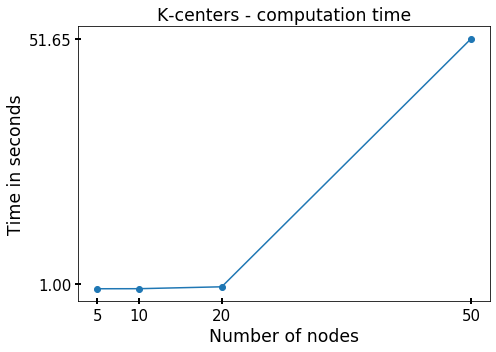

In [6]:
# Α.2 Εκτέλεση αλγορίθμων και γραφική παράσταση χρόνων εκτέλεσης 
# Να συμπληρώσετε τον παρακάτω κώδικα.
graph_paths = ['graph_0005_01234.gexf', 'graph_0010_01234.gexf',
               'graph_0015_01234.gexf', 'graph_0020_01234.gexf',
               'graph_0030_01234.gexf', 'graph_0050_01234.gexf',
               'graph_0146_01234.gexf', 'graph_0500_01234.gexf']
timings = []
# graph 5
path = graph_paths[0]
G = nx.read_gexf(path, node_type=int)

start = timeit.default_timer()
centers5, score5 = k_centers_brute_force(G, k=3)
timings.append(timeit.default_timer()-start)
print('k-centers computation time for 5 node graph and k=3 is: {:.5f} seconds'.format(timings[0]))


#  graph 10
path = graph_paths[1]
G = nx.read_gexf(path, node_type=int)

start = timeit.default_timer()
centers10, score10 = k_centers_brute_force(G, k=3)
timings.append(timeit.default_timer()-start)
print('k-centers computation time for 10 node graph and k=3 is: {:.5f} seconds'.format(timings[1]))


# graph 20
path = graph_paths[3]
G = nx.read_gexf(path, node_type=int)

start = timeit.default_timer()
centers20, score20 = k_centers_brute_force(G, k=3)
timings.append(timeit.default_timer()-start)
print('k-centers computation time for 20 node graph and k=3 is: {:.5f} seconds'.format(timings[2]))


# graph 50
path = graph_paths[5]
G = nx.read_gexf(path, node_type=int)

start = timeit.default_timer()
centers50, score50 = k_centers_brute_force(G, k=3)
timings.append(timeit.default_timer()-start)
print('k-centers computation time for 50 node graph and k=3 is: {:.5f} seconds'.format(timings[3]))

plt.figure(figsize=(7, 5))
plt.scatter([5, 10, 20, 50], timings)  # for the dots
plt.plot([5, 10, 20, 50], timings)     # for the line
plt.title('K-centers - computation time', fontsize='xx-large')
plt.xticks([5, 10, 20, 50])
plt.yticks([1, timings[-1]]) # use it or not to display all numbers
plt.tick_params(direction='inout', length=6, width=2, colors='k', labelsize=15)
plt.xlabel('Number of nodes', fontsize='xx-large')
plt.ylabel('Time in seconds', fontsize='xx-large')
plt.tight_layout()
plt.show()


Ερώτημα Α.3) Να εφαρμόσετε τον “brute force” αλγόριθμο για την εύρεση της βέλτιστης λύσης των στιγμιοτύπων graph_0030_01234.gexf για τις τιμές
k=2, k=3, k=4 και k=5. Να μετρήσετε τον χρόνο εκτέλεσης του αλγορίθμου για κάθε περίπτωση, να τυπώσετε τους χρόνους εκτέλεσης και τους απεικονίσετε σε γραφική παράσταση. Στον άξονα των x να υπάρχουν οι τιμές του k.

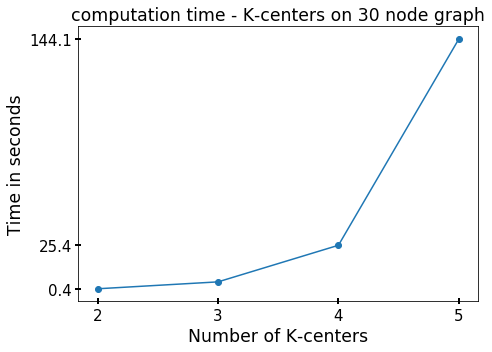

In [7]:
# Α.3 Εκτέλεση αλγορίθμων και γραφική παράσταση χρόνων εκτέλεσης 
# Να συμπληρώσετε τον παρακάτω κώδικα.

# graph 30
path = graph_paths[4]
G = nx.read_gexf(path, node_type=int)

timings30 = []
results = []
k_list = [2, 3, 4, 5]

for k in k_list:
    start = timeit.default_timer()
    tempres = k_centers_brute_force(G, k=k)  # tempres so that the append process doesnt affect the timing
    timings30.append(timeit.default_timer()-start)
    results.append(tempres)

plt.figure(figsize=(7, 5))
plt.scatter(k_list, timings30)  # for the dots
plt.plot(k_list, timings30)     # for the line
plt.title('computation time - K-centers on 30 node graph', fontsize='xx-large')
plt.xticks(k_list)
plt.yticks([timings30[0],*timings30[2:]])  #exclude if you want
plt.tick_params(direction='inout', length=6, width=2, colors='k', labelsize=15)
plt.xlabel('Number of K-centers', fontsize='xx-large')
plt.ylabel('Time in seconds', fontsize='xx-large')
plt.tight_layout()
plt.show()


Ερώτημα Α.4) Χρησιμοποιώντας τον brute force αλγόριθμο ή παραλλαγή του, να βρείτε όσο μπορείτε καλύτερες λύσεις για τα στιγμιότυπα
graph_0146_01234.gexf με k = 13 και 
graph_0500_01234.gexf με k = 13.

In [8]:
# Α.4
# Να συμπληρώσετε τον παρακάτω κώδικα.
def k_centers_brute_force_based(G, seed, k=13, stop=2000):
    """ setting a limit of loops and shuffling the nodes
    so new pairs created each time according to the seed"""
    # find the combination
    nodes = list(G.nodes)
    random.seed(seed)
    random.shuffle(nodes)

    comb = itertools.combinations(nodes, k)
    score = float('Inf')
    best_comb = []
    count = 0
    for centers in comb:
        count += 1
        temp_score = k_centers_objective_value(G,centers)
        if temp_score < score:
            score = temp_score
            best_comb = list(centers)
        if count > stop:
            break
    return score, best_comb


graph_paths = ['graph_0146_01234.gexf', 'graph_0500_01234.gexf']
print('graph 146,')
G146 = nx.read_gexf(graph_paths[0], node_type=int)
stoptime = 2000 #loops
sd146 = 495817325
result146 = k_centers_brute_force_based(G146, seed=sd146, k=13, stop=stoptime)
print(f'score: {result146[0]} seed: {sd146} stop time: {stoptime} centers: {result146[1]}')


print('graph 500,')
G500 = nx.read_gexf(graph_paths[1], node_type=int)
stoptime = 500 #loops
sd500 = 208517595
result500 = k_centers_brute_force_based(G500, seed=sd500, k=13, stop=stoptime)
print(f'score: {result500[0]} seed: {sd500} stop time: {stoptime} centers: {result500[1]}')


graph 146,
score: 846.0 seed: 495817325 stop time: 2000 centers: [30, 70, 67, 18, 32, 12, 5, 6, 74, 47, 124, 16, 10]
graph 500,
score: 2434.0 seed: 208517595 stop time: 500 centers: [440, 279, 101, 140, 427, 61, 79, 453, 468, 340, 171, 68, 454]


### Περιγραφή: Να δώσετε μια σύντομη περιγραφή της παραλλαγής του Brute-force που αναπτύξατε για το ερώτημα Α.4.

**Σε αυτή την υλοποίηση συμπεριλαμβάνεται περιορισμός των επαναλήψεων που κάνει ο αλγόριθμος το οποίο μεταφράζεται στο πόσους συνδιασμούς κόμβων θα εξετάσει. Επίσης η λίστα των κόμβων ανακατεύεται έτσι ώστε να προκύπτουν νέοι συνδιασμοί μέσω της  συνάρτησης itertools.combinations(), αφού η σειρά που έχουν οι κόμβοι εισόδου επηρεάζει τον τρόπο με τον οποίο 'γεννιούνται' οι συνδιασμοί.**

## Ερώτημα B: Greedy Algorithm

### Ερώτημα Β.1) Να υλοποιήσετε τον “greedy” αλγόριθμο από το βιβλίο Σχεδίαση Αλγορίθμων, Ενότητα 11.2

In [9]:
def k_centers_add(G, centers):
    shortest_paths = nx.multi_source_dijkstra_path_length(G, centers, weight='weight')
    # returning only the key
    furthest_node = max(shortest_paths, key=lambda kv: shortest_paths[kv])
    return furthest_node

def k_centers_greedy(G, k=3, first_center=None, seed=None):
    if first_center is None: 
        rng = random.Random(seed)
        centers = rng.sample(list(G.nodes), 1)
    else:
        centers = [first_center]
        
    for i in range(k-1):
        centers.append(k_centers_add(G, centers))
        
    score = k_centers_objective_value(G,centers)
    return score, centers

In [10]:
# Έλεγχος και αξιολόγηση της απάντησης. Μην κάνετε αλλαγές στο κελί αυτό.

G = nx.read_gexf('graph_0020_01234.gexf', node_type=int)
assert_equal(k_centers_greedy(G, 3, first_center=5), (471.0, [5, 8, 15]))
assert_equal(k_centers_greedy(G, 3, first_center=8), (472.0, [8, 10, 15]))



2) Να εφαρμόσετε τον “greedy” αλγόριθμο για την εύρεση της βέλτιστης λύσης των στιγμιοτύπων με k=3 στους γράφους
graph_0005_01234.gexf, graph_0010_01234.gexf, graph_0020_01234.gexf και graph_0050_01234.gexf. Να μετρήσετε τον χρόνο εκτέλεσης του αλγορίθμου για κάθε περίπτωση και να απεικονίσετε τους χρόνους σε γραφική παράσταση. Στον άξονα των x να υπάρχει το πλήθος των κόμβων του γράφου.

k-centers computation time for 5 node graph and k=3 is: 0.00082
k-centers computation time for 10 node graph and k=3 is: 0.00055
k-centers computation time for 20 node graph and k=3 is: 0.00127
k-centers computation time for 50 node graph and k=3 is: 0.01129


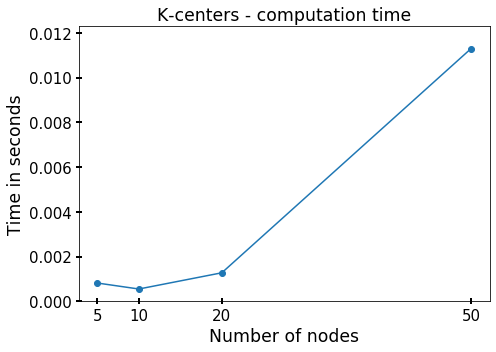

In [11]:
# Β.2 Εκτέλεση αλγορίθμων και γραφική παράσταση χρόνων εκτέλεσης 

graph_paths = ['graph_0005_01234.gexf', 'graph_0010_01234.gexf',
               'graph_0015_01234.gexf', 'graph_0020_01234.gexf',
               'graph_0030_01234.gexf', 'graph_0050_01234.gexf',
               'graph_0146_01234.gexf', 'graph_0500_01234.gexf']

timings = []

path = graph_paths[0]
G = nx.read_gexf(path, node_type=int)

start = timeit.default_timer()
centers5, score5 = k_centers_greedy(G, k=3)
timings.append(timeit.default_timer()-start)
print('k-centers computation time for 5 node graph and k=3 is: {:.5f}'.format(timings[0]))

#  graph 10
path = graph_paths[1]
G = nx.read_gexf(path, node_type=int)

start = timeit.default_timer()
centers10, score10 = k_centers_greedy(G, k=3)
timings.append(timeit.default_timer()-start)
print('k-centers computation time for 10 node graph and k=3 is: {:.5f}'.format(timings[1]))


# graph 20
path = graph_paths[3]
G = nx.read_gexf(path, node_type=int)

start = timeit.default_timer()
centers20, score20 = k_centers_greedy(G, k=3)
timings.append(timeit.default_timer()-start)
print('k-centers computation time for 20 node graph and k=3 is: {:.5f}'.format(timings[2]))


# graph 50
path = graph_paths[5]
G = nx.read_gexf(path, node_type=int)

start = timeit.default_timer()
centers50, score50 = k_centers_greedy(G, k=3)
timings.append(timeit.default_timer()-start)
print('k-centers computation time for 50 node graph and k=3 is: {:.5f}'.format(timings[3]))


plt.figure(figsize=(7, 5))
plt.scatter([5, 10, 20, 50], timings)  # for the dots
plt.plot([5, 10, 20, 50], timings)     # for the line
plt.title('K-centers - computation time', fontsize='xx-large')
plt.xticks([5, 10, 20, 50])
plt.ylim(0,timings[-1]+0.001)
plt.tick_params(direction='inout', length=6, width=2, colors='k', labelsize=15)
plt.xlabel('Number of nodes', fontsize='xx-large')
plt.ylabel('Time in seconds', fontsize='xx-large')
plt.tight_layout()
plt.show()

3) Να εφαρμόσετε τον “greedy” αλγόριθμο για την εύρεση της βέλτιστης λύσης των στιγμιοτύπων graph_0030_01234.gexf για τις τιμές
k=2, k=3, k=4 και k=5. Να μετρήσετε τον χρόνο εκτέλεσης του αλγορίθμου για κάθε περίπτωση, να τυπώσετε τους χρόνους εκτέλεσης και τους απεικονίσετε σε γραφική παράσταση. Στον άξονα των x να υπάρχουν οι τιμές του k.

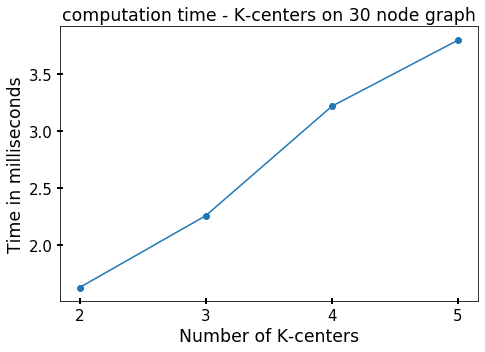

In [12]:
# Β.3 Εκτέλεση αλγορίθμων και γραφική παράσταση χρόνων εκτέλεσης 

# graph 30
path = graph_paths[4]
G = nx.read_gexf(path, node_type=int)

timings30 = []
results = []
k_list = [2, 3, 4, 5]

for k in k_list:
    start = timeit.default_timer()
    tempres = k_centers_greedy(G, k=k)  # tempres so that the append process doesnt affect the timing
    timings30.append(timeit.default_timer()-start)
    results.append(tempres)

# convert to milliseconds
timings30 = [round(1000*val,2) for val in timings30]

plt.figure(figsize=(7, 5))
plt.scatter(k_list, timings30)  # for the dots
plt.plot(k_list, timings30)     # for the line
plt.title('computation time - K-centers on 30 node graph', fontsize='xx-large')
plt.xticks(k_list)
# plt.yticks(timings30)
plt.tick_params(direction='inout', length=6, width=2, colors='k', labelsize=15)
plt.xlabel('Number of K-centers', fontsize='xx-large')
plt.ylabel('Time in milliseconds', fontsize='xx-large')
plt.tight_layout()
plt.show()

4) Χρησιμοποιώντας τον “greedy” αλγόριθμο ή παραλλαγή του, να βρείτε όσο μπορείτε καλύτερες λύσεις για τα στιγμιότυπα
graph_0146_01234.gexf με k = 13 και 
graph_0500_01234.gexf με k = 13.

In [13]:
# python code

def k_centers_greedy_based(G, k=13, first_center=None, seed=None):
    if first_center is None: 
        rng = random.Random(seed)
        centers = rng.sample(list(G.nodes), 1)
    else:
        centers = [first_center]
        
    for i in range(k-1):
        centers.append(k_centers_add(G, centers))
        
    score = k_centers_objective_value(G,centers)
    
    new_score, new_centers = solution_brute_force(G, centers, score)
    return new_score, new_centers


def solution_brute_force(G, centers, score):
    """ for each position of the solution try all nodes, choose the solution that gives best result"""
    print(f'initial score: {score}')
    # brute force for each center
    nodes = list(G.nodes)
    nodes = [node for node in nodes if node not in centers]
    best_score = copy.copy(score)
    best_centers = copy.copy(centers)
    
    for i in range(0, len(centers)):
        new_centers = copy.copy(centers)
        for node in nodes:  
            new_centers[i] = node
            new_score = k_centers_objective_value(G, new_centers)
            if new_score < best_score:
                best_score = copy.copy(new_score)
                best_centers = copy.copy(new_centers)
    return best_score, best_centers


graph_paths = ['graph_0146_01234.gexf', 'graph_0500_01234.gexf']

print('graph 146,')
G146 = nx.read_gexf(graph_paths[0], node_type=int)
sd146 = 689979766
result146 = k_centers_greedy_based(G146, seed=sd146, k=13)
print(f'final score: {result146[0]} seed: {sd146} centers: {result146[1]}')

print('graph 500,')
G500 = nx.read_gexf(graph_paths[1], node_type=int)
sd500 = 769833561
result500 = k_centers_greedy_based(G500, seed=sd500, k=13)
print(f'final score: {result500[0]} seed: {sd500} centers: {result500[1]}')


graph 146,
initial score: 853.0
final score: 808.0 seed: 689979766 centers: [109, 27, 125, 64, 127, 92, 58, 23, 19, 85, 52, 12, 63]
graph 500,
initial score: 2407.0
final score: 2218.0 seed: 769833561 centers: [476, 29, 372, 333, 237, 116, 80, 153, 471, 361, 238, 291, 316]


### Περιγραφή: Να δώσετε μια σύντομη περιγραφή της παραλλαγής του Brute-force που αναπτύξατε για το ερώτημα Β.4.

**Έχοντας την λύση του greedy αλγορίθμου εξετάζουμε το πόσο καλύτερες λύσεις μπορούμε να πάρουμε αλλάζοντας την τιμή ενός απο τα κέντρα-κόμβους. Για κάθε θέση της λύσης δοκιμάζουμε όλους τους διαθέσιμους κόμβους και καταγράφουμε το σκορ. Η λύση με το μικρότερο/καλύτερο σκορ επιστρέφεται. Ουσιαστικά χρησιμοποιούμε μία τεχνική local search εξαντλώντας όλους τους συνδιασμούς αντικατάστασης ενός κέντρου μέ ένα άλλο κόμβο του γράφου.**

## Ερώτημα Γ: Αυτοσχέδιος αλγόριθμος και μπόνους

Να αναπτύξετε αυτοσχέδιο αλγόριθμο ή αλγορίθμους για το πρόβλημα του k-center χρησιμοποιώντας όποιες αλγοριθμικές τεχνικές επιθυμείτε, αρκεί να γνωρίζετε πως και γιατί δουλεύουν. Να εφαρμόσετε τον αλγόριθμο ή τους αλγορίθμους για να βρείτε όσο καλύτερες λύσεις μπορείτε για τα στιγμιότυπα
graph_0146_01234.gexf και graph_0500_01234.gexf με k = 13. 
Προαιρετικά μπορείτε να ανακοινώνετε το κόστος των καλύτερων λύσεων (όχι ποιους κόμβους περιλαμβάνουν) στο θέμα
https://www.deece.edu.gr/forum/viewtopic.php?f=222&t=9134.


In [14]:
# python code

def k_center_algorithm(G, seed, max_temp, kmax, initial_solution=None, initial_score=None):
    random.seed(seed)
    
    if initial_solution is None:
        initial_solution = random.sample(list(G.nodes), k=13)
        current_sol = copy.deepcopy(initial_solution)
        current_score = k_centers_objective_value(G, current_sol)
    else:
        current_sol = copy.deepcopy(initial_solution)
        if initial_score is None:
            current_score = k_centers_objective_value(G,initial_solution)
        else:
            current_score = copy.deepcopy(initial_score)

            
    best_sol = copy.deepcopy(current_sol)
    best_score = copy.deepcopy(current_score)
    
    for k in range(0, kmax):
        temp = temperature(k, max_temp, kmax)
        new_sol, new_score = neighbour(G, current_sol)
        prob = acceptance_probability(current_score, new_score, temp)
        if prob > random.random(): # if new_score is better then take this score if its not take it with probability
            current_sol = copy.deepcopy(new_sol)
            current_score = copy.deepcopy(new_score)

        # I keep the best scores found during this process and this is the output of the function
        if current_score < best_score:
            best_score = copy.deepcopy(current_score)
            best_sol = copy.deepcopy(current_sol)

    return best_sol, best_score
    
    
def acceptance_probability(current_score, new_score, temperature):
    """ calculate the probability of acceptance. characteristics:
        -the worst the new solution the lower the probability (good solution has the lowest score)
        -the smaller the temperature the lower the probability of choosing a worst score
        -choose good scores always with probability of one"""
    steepness = 10
    if new_score < current_score:
        probability = 1
    elif temperature > 0:
        probability = np.exp((current_score-new_score)*steepness/temperature)
    else:
        probability = 0
    return probability


def temperature(iteration, max_temp, kmax):
    """ on the begining when iteration = 0 temperature will be maximum, set by max_temp
        as iteration reaches kmax temperature will be reaching zero """
    if max_temp - iteration > 0:
        temp = max_temp - iteration*max_temp/kmax  # like this it will reduce evenly to 0 through all iterations
    else:
        temp = 0
    return temp


def neighbour(G, sol):
    """ change randomly a center with a random other center """
    nodes = list(G.nodes)
    nodes = [node for node in nodes if node not in sol] #excluding the nodes that already exist in the solution
    rand_center = random.choice(nodes)
    rand_index = random.randint(0, len(sol)-1)
    new_sol = copy.deepcopy(sol)
    new_sol[rand_index] = rand_center
    new_score = k_centers_objective_value(G, new_sol)
    return new_sol, new_score


In [15]:
# Καλύτερη λύση για το πρόβλημα graph_0146_01234.gexf
best_cost_0146 = 742.0
best_centers_0146 = [108, 105, 60, 38, 73, 36, 134, 54, 102, 44, 100, 61, 59]
seed = 631464140
max_temp = 300
kmax = 2000

In [16]:
# Έλεγχος και αξιολόγηση της απάντησης. Μην κάνετε αλλαγές στο κελί αυτό.

In [17]:
# Καλύτερη λύση για το πρόβλημα graph_0500_01234.gexf
best_cost_0500 = 1925.0
best_centers_0500 = [8, 304, 42, 383, 254, 167, 297, 20, 435, 124, 178, 374, 398]
seed = 83962488
max_temp = 500
kmax = 1100

In [18]:
# Έλεγχος και αξιολόγηση της απάντησης. Μην κάνετε αλλαγές στο κελί αυτό.

### Περιγραφή: Να δώσετε μια σύντομη περιγραφή της παραλλαγής του Brute-force που αναπτύξατε για το ερώτημα Γ.

**Ο αλγόριθμος ακολουθεί την λογική του _Simulated annealing_.Αρχικά δημιουργούμε μία λύση με τυχαίο τρόπο ή εισάγουμε μία. Στην προκείμενη περίπτωση η λύση δημιουργείται, εναλλακτικά θα μπορούσαμε να εισάγουμε, για παράδειγμα, το αποτέλεσμα του greedy αλγορίθμου. Ο αλγόριθμος τρέχει για συγκεκριμένο αριθμό επαναλήψεων _kmax_. Σε κάθε επανάληψη κάνουμε τα εξής:**

 - **Υπολογίζεται μία τιμή 'θερμοκρασίας' _temp_ μέσω της συνάρτησης _temperature(iteration, max_temp, kmax)_. Η τιμή που επιστρέφει η συνάρτηση είναι μέγιστη για την πρώτη επανάληψη και όρίζεται απο την μεταβλητή _max_temp_. Καθώς αυξάνονται οι επαναλήψεις η τιμή μειώνεται ομαλά, έως ότου στην τελευταία επανάληψη η τιμή που επιστρέφει βρίσκεται πολύ κοντά στο μηδεν.**

 - **Υπολογίζουμε μία νέα λύση μέσω της συνάρτησης neighbour(G, sol), όπου με τυχαιο τρόπο επιλέγουμε ένα απο τα κέντρα και το αντικαθηστούμε τυχαία με ένα άλλο, το οποίο δεν υπάρχει ηδη στην λύση.**

 - **Υπολογίσουμε μια πιθανότητα γνωστή ως _acceptance probability_ μέσω της ομώνυμης συνάρτησης. Όπως περιγράφεται και στα σχόλια, η συνάρτηση επιστρέφει 1 αν το σκορ της νεας λύσης (που υπολογίσαμε στο προηγούμενο βήμα) είναι καλύτερο, μηδέν αν η παράμετρος θερμοκρασίας ισούτε με μηδεν (στην υλοποίηση μας δεν συμβαίνει ποτέ αυτο) ή μία τιμή η οποία υπολογίζεται απο τον τύπο ο οποίος φαίνεται στην συνάρτηση. Ο τύπος επιστρέφει μια τιμη που μειώνεται όσο μεγαλύτερη είναι η διαφορά των σκορ της παλιας και της νέας λύσης (στην περίπτωση που η νέα λύση είναι χειρότερη απο την παλιά) και μειώνεται όσο πιο μίκρη έιναι η παράμετρος της θερμοκρασίας.Η παράμετρος _steepness_ όσο πιο μεγάλη είναι τόσο πιο μικρή η πιθανότητα,ουσιαστικά έχουμε μικρότερη ανέχεια σε μεγάλες διαφορές των σκόρ, επιλέχθηκε έπειτα απο δοκιμές.**

 - **Βάση αυτής της πιθανότητας επιλέγουμε άν θα κρατήσουμε αυτή την λύση ώς λύση ως _current solution_ έτσι ώστε να την τροποποιήσουμε στην συνέχεια ή να την αγνοήσουμε.**

 - **Διατηρούμε μία μεταβλητή _best_sol_ στην οποία αποθηκεύουμε την καλήτερη λύση που έχει υπολογιστεί. Αυτή είναι και η επιστροφή της συνάρτησης, μαζί με το σκορ της λύσης.**

**Ο αλγόριθμος είναι χρήσιμος για την αποφυγή τοπικών ελαχίστων και χρειάζεται κατάλληλες τιμες για τις μεταβλητές _kmax_ και _max_temp_ για να δουλέψει βέλτιστα. Η επιλογή των τιμών που χρησιμοποιήθηκαν έγινε έπειτα απο δοκιμές.**


*Επιπλέον,* <br> 
*Η λύση που θα παραχθεί απο αυτή την συνάρτηση θα μπορούσε να εισαχθεί στην συνάρτηση _solution_brute_force()_ του προηγούμενου ερωτήματος για πιθανώς καλύτερα αποτελέσματα (βρέθηκε λύση με σκορ 727 για τον γράφο 146 με αυτή την υλοποίηση) παρόλα αυτά αυτός ο τρόπος δεν παρουσιάζεται στην εργασία.*